This notebook explores the new results from the power simulation. Old notebooks looked at results from an older version of the code, where I wrote two files: one with the total N significant and the other with the actual q-values for each OTU. That second file got way too big with more reps, so I re-wrote the code to calculate the number of "top hits" which were significant in each repetition. This file gets written now, and is the one I'll look at here.

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-white')
sns.set_palette(sns.color_palette('muted'))

In [2]:
fres = '../../data/analysis/power_simulation.top_hits_sig.50_reps.txt'

df = pd.read_csv(fres, sep='\t')
df.head()

,n_rejected,n_top_hits,taxa_level,n_ctrl,n_case,total_n,perc_case,study,rep
0,0,3,genus,9,1,10,0.10,cdi_schubert,0
1,0,5,genus,9,1,10,0.10,cdi_schubert,0
2,0,10,genus,9,1,10,0.10,cdi_schubert,0
3,0,3,genus,8,3,10,0.25,cdi_schubert,0
4,0,5,genus,8,3,10,0.25,cdi_schubert,0


## Number rejected for all reps

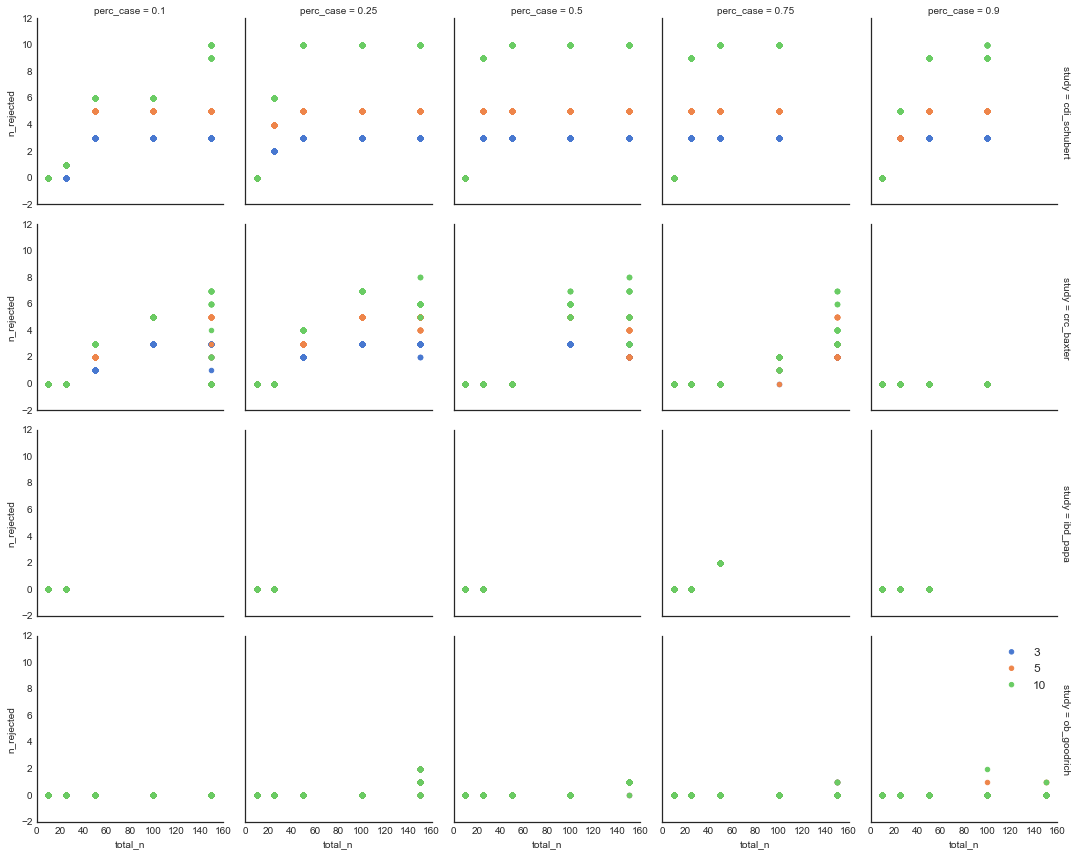

In [4]:
g = sns.FacetGrid(col='perc_case', row='study', 
                  data=df, hue='n_top_hits',
                  sharey=True, margin_titles=True)
g.map(plt.scatter, 'total_n', 'n_rejected')
plt.legend(loc='upper right')

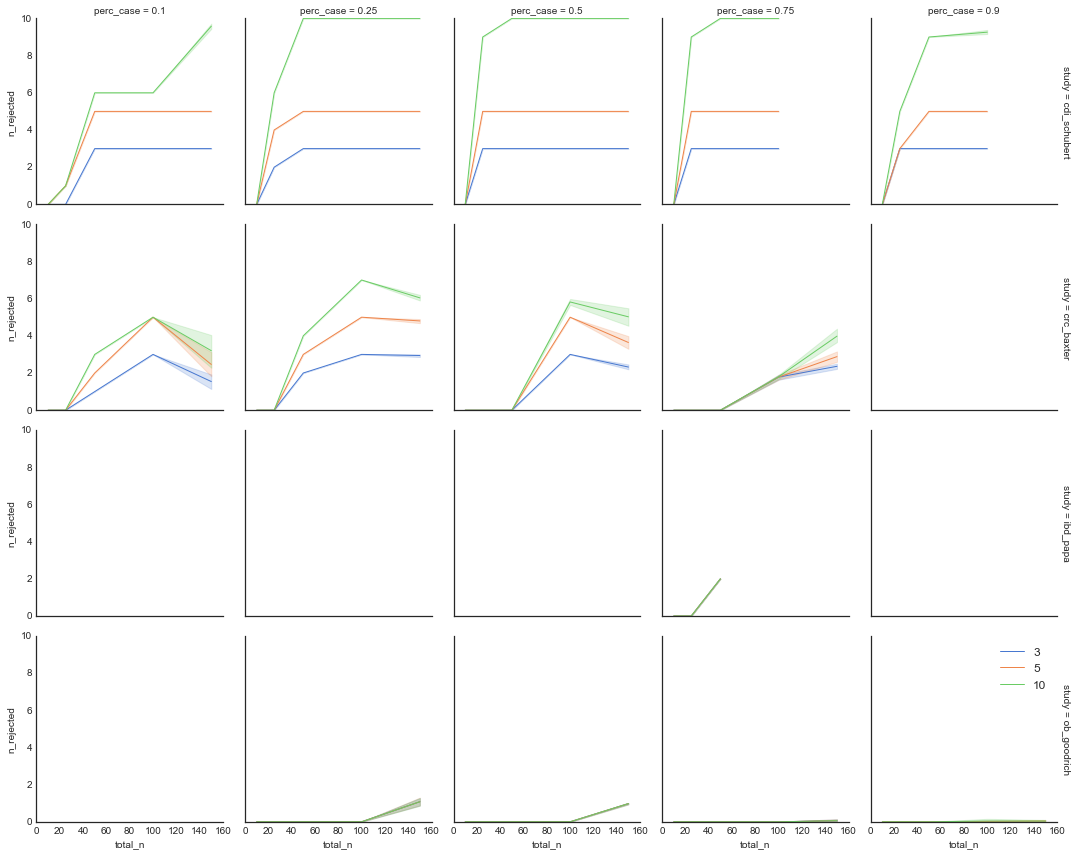

In [8]:
g = sns.FacetGrid(col='perc_case', row='study', 
                  data=df, hue='n_top_hits',
                  sharey=True, margin_titles=True)
g.map(sns.lineplot, 'total_n', 'n_rejected')
plt.legend(loc='upper right')

## Mean number rejected

Hm, this is kind of silly. I think that I will just plot the mean number rejected. (Then, I should consider plotting the "power" directly)

In [10]:
meandf = (
    df.groupby(['taxa_level', 'study', 'total_n', 'perc_case', 'n_top_hits']).mean()
    ).reset_index()
meandf.head()


,taxa_level,study,total_n,perc_case,n_top_hits,n_rejected,n_ctrl,n_case,rep
0,genus,cdi_schubert,10,0.10,3,0.0,9.0,1.0,24.5
1,genus,cdi_schubert,10,0.10,5,0.0,9.0,1.0,24.5
2,genus,cdi_schubert,10,0.10,10,0.0,9.0,1.0,24.5
3,genus,cdi_schubert,10,0.25,3,0.0,8.0,3.0,24.5
4,genus,cdi_schubert,10,0.25,5,0.0,8.0,3.0,24.5


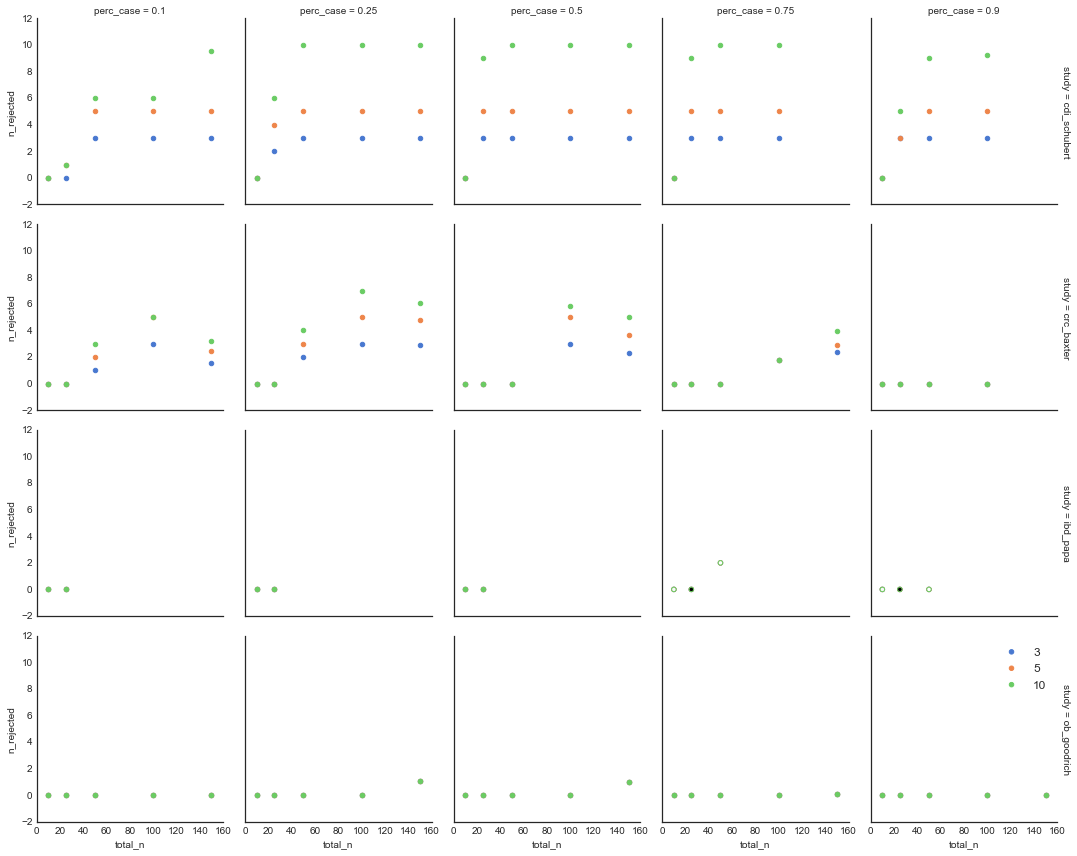

In [12]:
g = sns.FacetGrid(col='perc_case', row='study', 
                  data=meandf, hue='n_top_hits',
                  sharey=True, margin_titles=True)
g.map(plt.scatter, 'total_n', 'n_rejected')
plt.legend(loc='upper right')

# Calculate power

We'll calculate power as the percent of reps that >= 50% of the top hits were recovered.

In [23]:
df['powered'] = df['n_rejected'] > np.floor(0.5*df['n_top_hits'])
df.iloc[15:25]

,n_rejected,n_top_hits,taxa_level,n_ctrl,n_case,total_n,perc_case,study,rep,powered
15,0,3,genus,23,3,25,0.10,cdi_schubert,0,False
16,1,5,genus,23,3,25,0.10,cdi_schubert,0,False
17,1,10,genus,23,3,25,0.10,cdi_schubert,0,False
18,2,3,genus,19,7,25,0.25,cdi_schubert,0,True
19,4,5,genus,19,7,25,0.25,cdi_schubert,0,True
20,6,10,genus,19,7,25,0.25,cdi_schubert,0,True
21,3,3,genus,13,13,25,0.50,cdi_schubert,0,True
22,5,5,genus,13,13,25,0.50,cdi_schubert,0,True
23,9,10,genus,13,13,25,0.50,cdi_schubert,0,True
24,3,3,genus,7,19,25,0.75,cdi_schubert,0,True


In [30]:
powerdf = (
    df.groupby(['study', 'total_n', 'perc_case', 'n_top_hits'])
    ['powered']
    .sum()
    .reset_index()
    )
powerdf = powerdf.rename(columns={'powered': 'n_reps_powered'})
powerdf['power'] = powerdf['n_reps_powered'] / 50.0
powerdf.iloc[15:25]

,study,total_n,perc_case,n_top_hits,n_reps_powered,power
15,cdi_schubert,25,0.10,3,0.0,0.0
16,cdi_schubert,25,0.10,5,0.0,0.0
17,cdi_schubert,25,0.10,10,0.0,0.0
18,cdi_schubert,25,0.25,3,50.0,1.0
19,cdi_schubert,25,0.25,5,50.0,1.0
20,cdi_schubert,25,0.25,10,50.0,1.0
21,cdi_schubert,25,0.50,3,50.0,1.0
22,cdi_schubert,25,0.50,5,50.0,1.0
23,cdi_schubert,25,0.50,10,50.0,1.0
24,cdi_schubert,25,0.75,3,50.0,1.0


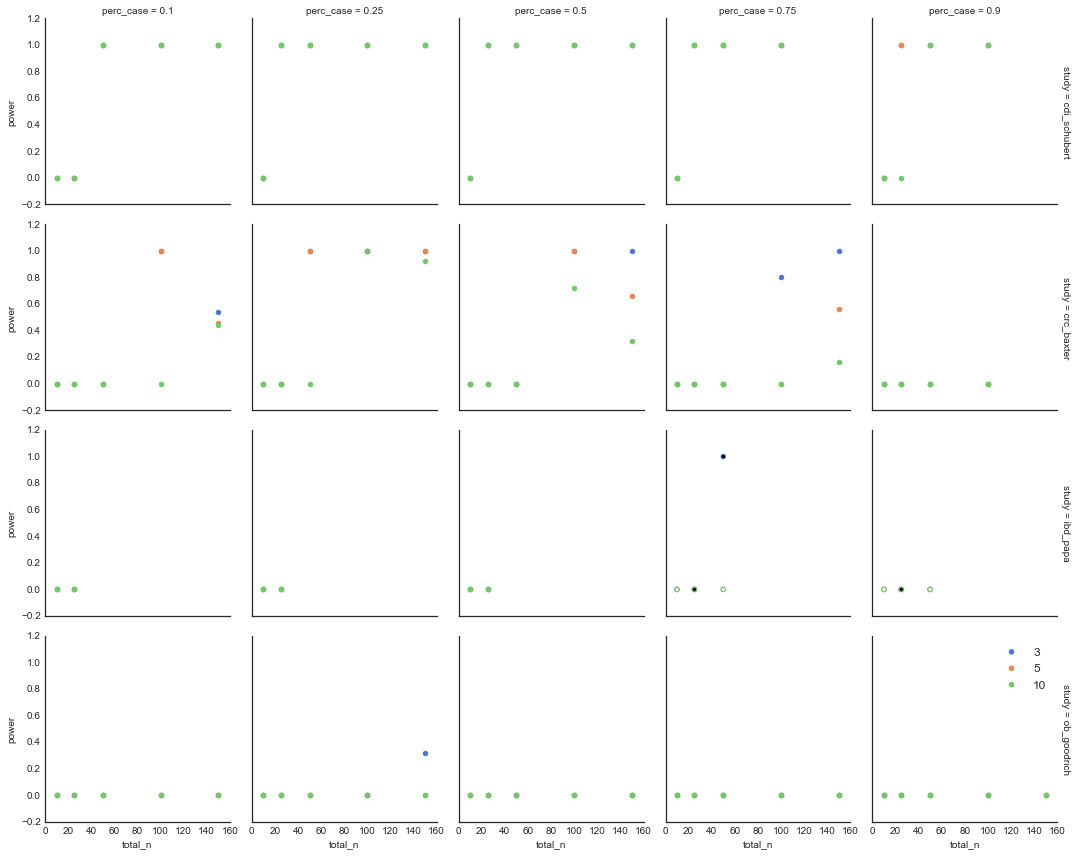

In [31]:
g = sns.FacetGrid(col='perc_case', row='study', 
                  data=powerdf, hue='n_top_hits',
                  sharey=True, margin_titles=True)
g.map(plt.scatter, 'total_n', 'power')
plt.legend(loc='upper right')

# Different types of figures

Okay, so the power calculation makes the figure less comprehensible than just showing the raw number of rejections. Let's stick with showing n_rejected.

But let's try to make a better version of this figure, with the different "effect sizes" all on one plot. Since the trends for all of the "n top hits" match, we'll just go with the top 10.

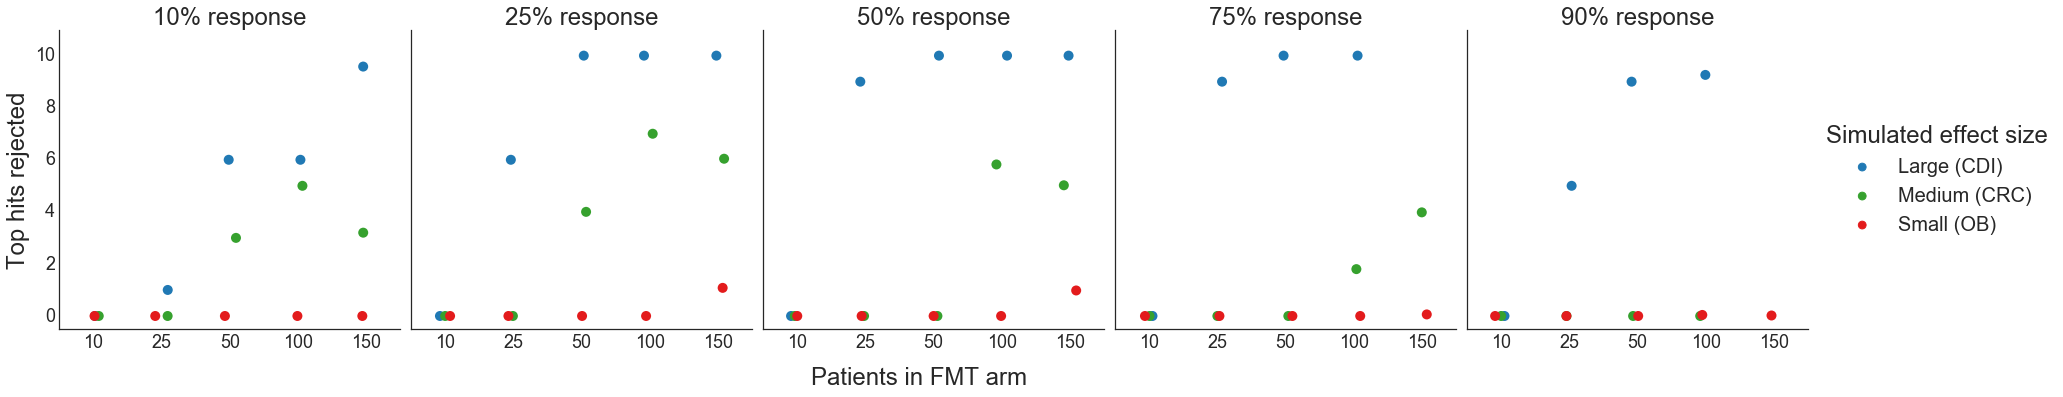

In [97]:
# The ibd_papa study has too few samples to add anything to this figure
toplot = meandf.query('study != "ibd_papa"')

# Keep only n_top_hits == 10
toplot = toplot.query('n_top_hits == 10')


g = sns.catplot(data=toplot, x='total_n', y='n_rejected',
                hue='study', col='perc_case', 
                palette=sns.color_palette("Paired")[1::2],
                legend=False,
                **{'s': 10})

i = 0
for ax in g.axes[0]:
    perc_case = float(ax.get_title().split('=')[1].strip())
    ax.set_title('{:.0f}% response'.format(perc_case*100), fontsize=24)

    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)

    ax.set_ylim([-0.5, 11])

    if i == 0:
        ax.set_ylabel('Top hits rejected', fontsize=24)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
        i += 1

g.fig.text(0.5, -0.05, 'Patients in FMT arm', ha='center', fontsize=24)

labels = ['Large (CDI)', 'Medium (CRC)', 'Small (OB)']
handles, _ = ax.get_legend_handles_labels()
lgd = ax.legend(
    handles, labels, title='Simulated effect size',
    loc='center left', bbox_to_anchor=(1, 0.5), 
    fontsize=20, frameon=False)
lgd.get_title().set_fontsize(24)

In [80]:
ax.legend?